In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
base_path = os.path.abspath('../')
directory = os.path.join(base_path, 'Downloads/take_home_data_science_challenge')

In [3]:
sales = pd.read_excel(os.path.join(directory, 'case_study.xlsx'), index_col='ISO_Week', parse_dates=True)

In [4]:
sales.head(5)

,SKU,Sales,Season
ISO_Week,,,
2018-01,ProductA,0.0,WINTER
2018-02,ProductA,0.0,WINTER
2018-03,ProductA,0.0,WINTER
2018-04,ProductA,6988.0,WINTER
2018-04,ProductA,6988.0,WINTER


In [5]:
sales_pivot = pd.pivot_table(sales, values = 'Sales', index=['ISO_Week','Season'], columns = ['SKU'])

In [6]:
sales_pivot.head(10)

,SKU,ProductA,ProductB,ProductC
ISO_Week,Season,,,
2018-01,WINTER,0.0,NaN,NaN
2018-02,WINTER,0.0,NaN,NaN
2018-03,WINTER,0.0,NaN,NaN
2018-04,WINTER,6988.0,-23.0,NaN
2018-05,WINTER,6743.0,446.0,NaN
2018-06,WINTER,4112.0,361.0,NaN
2018-07,WINTER,5732.0,229.0,NaN
2018-08,WINTER,NaN,219.0,NaN
2018-09,SPRING,5559.0,495.0,NaN


In [7]:
sales_pivot.reset_index(inplace=True)

In [8]:
sales_pivot.head(5)

SKU,ISO_Week,Season,ProductA,ProductB,ProductC
0,2018-01,WINTER,0.0,NaN,NaN
1,2018-02,WINTER,0.0,NaN,NaN
2,2018-03,WINTER,0.0,NaN,NaN
3,2018-04,WINTER,6988.0,-23.0,NaN
4,2018-05,WINTER,6743.0,446.0,NaN


In [9]:
sales_pivot['ISO_Week'] = pd.to_datetime(sales_pivot.ISO_Week.add('-1'), format='%Y-%W-%w') 
sales_pivot['Week_Number'] = pd.to_numeric(sales_pivot['ISO_Week'].dt.day / 7)
sales_pivot['Week_Number'] = sales_pivot.Week_Number.apply(lambda x: math.ceil(x))
sales_pivot['Week_Sequence'] = pd.to_numeric(sales_pivot['ISO_Week'].dt.week)
sales_pivot['Month'] = pd.to_numeric(sales_pivot['ISO_Week'].dt.month)

In [10]:
sales_pivot.index = sales_pivot.ISO_Week
sales_pivot.drop(columns=['ISO_Week'], inplace=True)

In [11]:
sales_pivot['ProductA_Promotion'] = sales_pivot.ProductA.apply(lambda x: x>10000)
sales_pivot['ProductC_Promotion'] = sales_pivot.ProductC.apply(lambda x: x>10000)

In [12]:
col = sales_pivot.columns.tolist()
col.insert(2, col.pop(col.index('ProductA_Promotion')))
sales_pivot = sales_pivot[col]

In [13]:
col = sales_pivot.columns.tolist()
col.insert(5, col.pop(col.index('ProductC_Promotion')))
sales_pivot = sales_pivot[col]

In [14]:
promotion_map = {True:1, False:0}
season_map = {'AUTUMN':0, 'SPRING':1, 'SUMMER':2, 'WINTER':3}

In [15]:
sales_pivot['ProductA_Promotion'] = sales_pivot.ProductA_Promotion.map(promotion_map)
sales_pivot['ProductC_Promotion'] = sales_pivot.ProductC_Promotion.map(promotion_map)

In [16]:
sales_pivot.columns

Index(['Season', 'ProductA', 'ProductA_Promotion', 'ProductB', 'ProductC',
       'ProductC_Promotion', 'Week_Number', 'Week_Sequence', 'Month'],
      dtype='object', name='SKU')

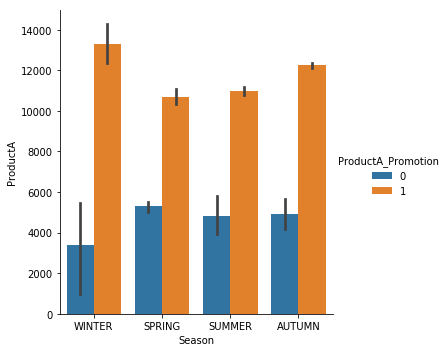

In [17]:
sns.catplot(x='Season', y='ProductA', hue='ProductA_Promotion', kind="bar", data=sales_pivot)

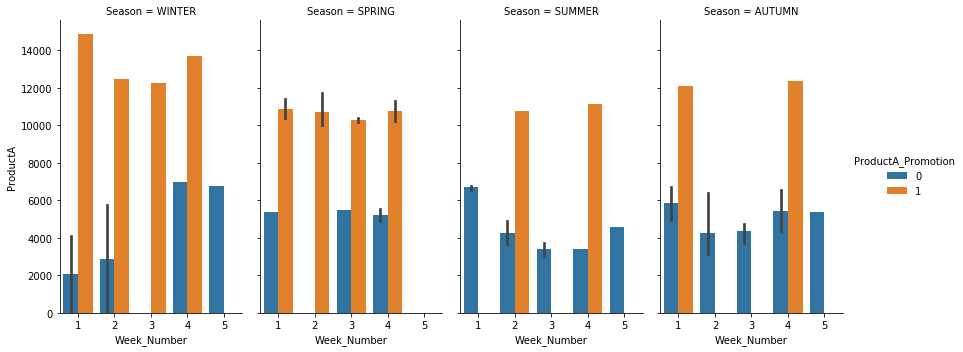

In [18]:
sns.catplot(x="Week_Number", y="ProductA", hue="ProductA_Promotion",
            col="Season", aspect=.6,
            kind="bar", data=sales_pivot);

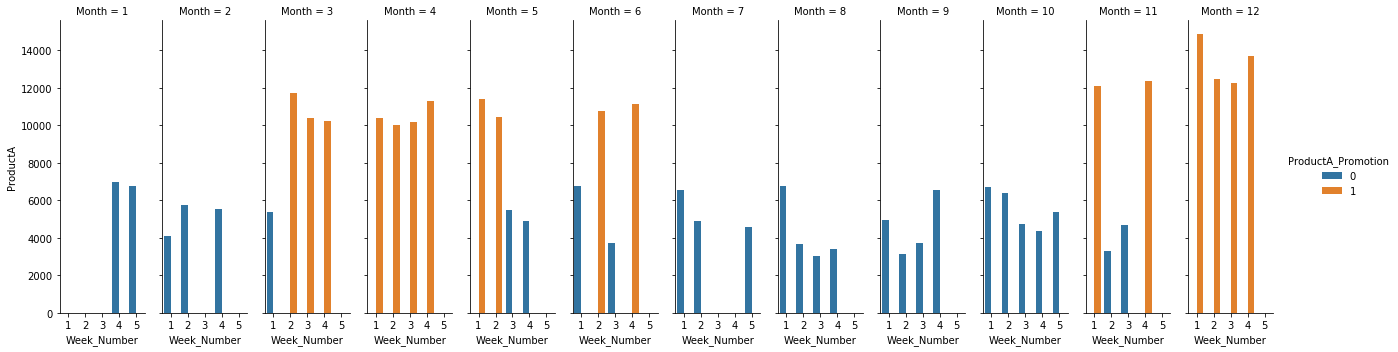

In [19]:
sns.catplot(x="Week_Number", y="ProductA", hue="ProductA_Promotion",
            col="Month", aspect=.3,
            kind="bar", data=sales_pivot);

In [20]:
sales_pivot['Season'] = sales_pivot.Season.map(season_map)

In [21]:
prod_a = sales_pivot.loc[:, ['Season', 'ProductA', 'ProductA_Promotion', 'Week_Number', 'Week_Sequence','Month']]
prod_b = sales_pivot.loc[:, ['Season', 'ProductB', 'Week_Number', 'Week_Sequence', 'Month']]
prod_c = sales_pivot.loc['2018-03-18':, ['Season', 'ProductC', 'ProductC_Promotion', 'Week_Number', 'Week_Sequence', 'Month']]

In [22]:
prod_a.dropna(inplace=True)
prod_b.dropna(inplace=True)
prod_c.dropna(inplace=True)

In [23]:
import seaborn as sns

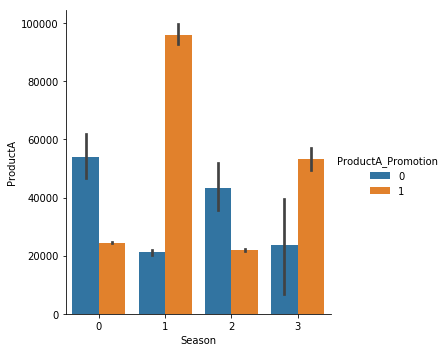

In [24]:
sns.catplot(x="Season", y="ProductA", hue="ProductA_Promotion", kind="bar", data=prod_a, estimator=sum);

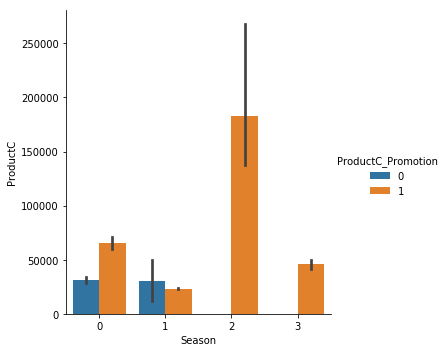

In [25]:
sns.catplot(x="Season", y="ProductC", hue="ProductC_Promotion", kind="bar", data=prod_c, estimator=sum);

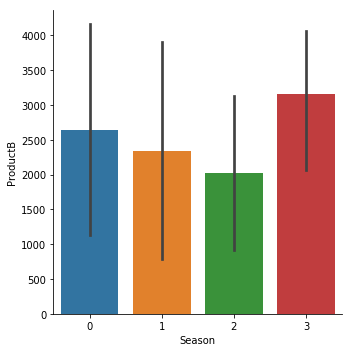

In [26]:
sns.catplot(x="Season", y="ProductB",  kind="bar", data=prod_b, estimator=sum);

In [27]:
train_a = prod_a.loc[prod_a['Week_Sequence'] < 42]
test_a = prod_a.loc[prod_a['Week_Sequence'] >= 42]

train_b = prod_b.loc[prod_b['Week_Sequence'] < 42]
test_b = prod_b.loc[prod_b['Week_Sequence'] >= 42]

train_c = prod_c.loc[prod_c['Week_Sequence'] < 42]
test_c = prod_c.loc[prod_c['Week_Sequence'] >= 42]

In [28]:
train_a.drop(train_a[train_a.ProductA == 0].index, inplace=True)
train_b.drop(train_b[train_b.ProductB == 0].index, inplace=True)
train_c.drop(train_c[train_c.ProductC == 0].index, inplace=True)

train_a = train_a.drop(columns=['Week_Sequence'])
train_b = train_b.drop(columns=['Week_Sequence'])
train_c = train_c.drop(columns=['Week_Sequence'])

C:\Users\Saurav\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
train = [train_a, train_b, train_c]
test = [test_a, test_b, test_c]
product = ['ProductA', 'ProductB', 'ProductC']

In [30]:
for pos, i in enumerate(train):
    
    q75, q25 = np.percentile(i.loc[:, product[pos]], [75, 25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    i.loc[i[product[pos]] < minimum, product[pos]] = np.nan
    i.loc[i[product[pos]] > maximum, product[pos]] = np.nan

In [31]:
for i in train:
    i.dropna(inplace=True)

In [32]:
train_a_y = train_a['ProductA']
train_a_X = train_a.drop(columns=['ProductA'])

train_b_y = train_b['ProductB']
train_b_X = train_b.drop(columns=['ProductB'])

train_c_y = train_c['ProductC']
train_c_X = train_c.drop(columns=['ProductC'])

train_y = [train_a_y, train_b_y, train_c_y]
train_X = [train_a_X, train_b_X, train_c_X]

In [33]:
for i in test:
    i.drop(columns=['Week_Sequence'], inplace=True)

In [34]:
test_a_y = test_a['ProductA']
test_a_X = test_a.drop(columns=['ProductA'])

test_b_y = test_b['ProductB']
test_b_X = test_b.drop(columns=['ProductB'])

test_c_y = test_c['ProductC']
test_c_X = test_c.drop(columns=['ProductC'])

test_y = [test_a_y, test_b_y, test_c_y]
test_X = [test_a_X, test_b_X, test_c_X]

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
model_a = RandomForestRegressor()
model_b = RandomForestRegressor()
model_c = RandomForestRegressor()
model = [model_a, model_b, model_c]

In [37]:
for (i, j, k) in zip(model, train_X, train_y):
    
    i.fit(j, k)
    i.fit(j, k)
    i.fit(j, k)

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
pred_a = model_a.predict(test_a_X)
pred_b = model_b.predict(test_b_X)
pred_c = model_c.predict(test_c_X)

pred = [pred_a, pred_b, pred_c]

In [40]:
# print(model_a.score(test_a_X, test_a_y))
# print(model_b.score(test_b_X, test_b_y))
# print(model_c.score(test_c_X, test_c_y))

In [41]:
test_a_y = test_a_y.reset_index()
test_b_y = test_b_y.reset_index()
test_c_y = test_c_y.reset_index()

In [42]:
date_intervals = test_a_y['ISO_Week'].dt.strftime('%Y-%W')

In [43]:
data_a = {'ISO_Week': date_intervals, 'Forecast':pred_a}
data_b = {'ISO_Week': date_intervals, 'Forecast':pred_b}
data_c = {'ISO_Week': date_intervals, 'Forecast':pred_c}

In [44]:
op_a = pd.DataFrame(data=data_a)
op_b = pd.DataFrame(data=data_b)
op_c = pd.DataFrame(data=data_c)

In [45]:
op_a['SKU'] = 'ProductA'
op_b['SKU'] = 'ProductB'
op_c['SKU'] = 'ProductC'

In [46]:
op_a.index = op_a['SKU']
op_a.drop(columns='SKU', inplace=True)

op_b.index = op_b['SKU']
op_b.drop(columns='SKU', inplace=True)

op_c.index = op_c['SKU']
op_c.drop(columns='SKU', inplace=True)

In [47]:
final_op = pd.concat([op_a, op_b, op_c])

In [48]:
final_op

,ISO_Week,Forecast
SKU,,
ProductA,2018-42,4877.0
ProductA,2018-43,5897.5
ProductA,2018-44,5897.5
ProductA,2018-45,11222.7
ProductA,2018-46,5422.9
ProductA,2018-47,4877.0
ProductA,2018-48,10733.5
ProductA,2018-49,11262.6
ProductA,2018-50,10966.6


In [ ]:
final_op.to_excel('Output.xlsx')

In [ ]:
# rolmean = prod_a['ProductA'].rolling(window=4).mean()
# rolstd = prod_a['ProductA'].rolling(window=4).std()
# plt.figure(figsize=(15,5))
# #Plot rolling statistics:
# orig = plt.plot(prod_a['ProductA'], color='blue',label='Original')
# mean = plt.plot(rolmean, color='red', label='Rolling Mean')
# std = plt.plot(rolstd, color='black', label = 'Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# #plt.savefig('Rolling_Statistics.png', bbox_inches='tight')
# plt.show(block=False)

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(prod_a_series['ProductA'].values, autolag='AIC')
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))